In [0]:
#https://medium.com/datadriveninvestor/multivariate-time-series-using-rnn-with-keras-7f78f4488679

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
weather_data = pd.read_csv("/content/weather with dates.csv")

In [5]:
weather_data.head(2)

,Year,Average of Avg. Temperature in Kelvin,Average of NDVI Avg. Number of pixel,Average of SNOW Avg. Number of Pixels
0,01-01-2001,271.344059,9418.25,6790.325
1,01-02-2001,273.913663,12998.90,6497.100


In [6]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
Year                                     204 non-null object
Average of Avg. Temperature in Kelvin    204 non-null float64
Average of NDVI Avg. Number of pixel     204 non-null float64
Average of SNOW Avg. Number of Pixels    204 non-null float64
dtypes: float64(3), object(1)
memory usage: 6.5+ KB


In [0]:
input_feature= weather_data.iloc[:,[1,3]].values
input_data = input_feature

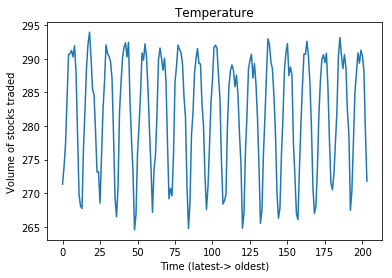

In [8]:
plt.plot(input_feature[:,0])
plt.title("Temperature")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Volume of stocks traded")
plt.show()

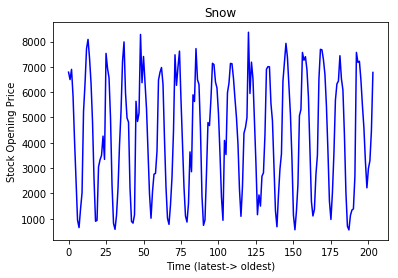

In [9]:
plt.plot(input_feature[:,1], color='blue')
plt.title("Snow")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Stock Opening Price")
plt.show()

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
input_data[:,0:2] = sc.fit_transform(input_feature[:,:])

In [0]:
lookback= 60
test_size=int(.3 * len(weather_data))
X=[]
y=[]
for i in range(0, len(weather_data)-lookback):
    t=[]
    for j in range(0,lookback):
        
        t.append(input_data[[(i+j)], :])
    X.append(t)
    y.append(input_data[i,1])

In [12]:
X, y= np.array(X), np.array(y)
X_test = X[:test_size]

X = X.reshape(X.shape[0],lookback, 2)
X_test = X_test.reshape(X_test.shape[0],lookback, 2)
print(X.shape)
print(X_test.shape)

(144, 60, 2)
(61, 60, 2)


In [13]:
from keras import Sequential
from keras.layers import Dense, LSTM

Using TensorFlow backend.


In [14]:
model = Sequential()
model.add(LSTM(units=30, return_sequences= True, input_shape=(X.shape[1],2)))
model.add(LSTM(units=30, return_sequences=True))
model.add(LSTM(units=30))
model.add(Dense(units=1))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 30)            3960      
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 30)            7320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 18,631
Trainable params: 18,631
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [16]:
model.fit(X, y, epochs=100, batch_size=32)


Instructions for updating:
Use tf.cast instead.
Epoch 1/100
144/144 [==============================] - 2s 13ms/step - loss: 0.2886
Epoch 2/100
144/144 [==============================] - 0s 3ms/step - loss: 0.1368
Epoch 3/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0958
Epoch 4/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0893
Epoch 5/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0865
Epoch 6/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0870
Epoch 7/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0802
Epoch 8/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0822
Epoch 9/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0792
Epoch 10/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0780
Epoch 11/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0776
Epoch 12/100
144/144 [=========================

In [0]:
predicted_value= model.predict(X_test)


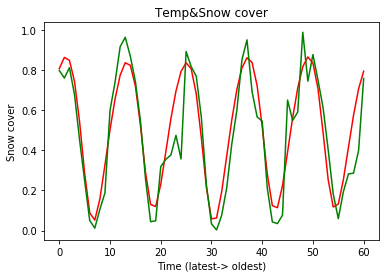

In [18]:
plt.plot(predicted_value, color= 'red')
plt.plot(input_data[:61,1], color='green')
plt.title("Temp&Snow cover")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Snow cover")
plt.show()

In [0]:
#import sklearn
#sklearn.metrics.r2_score(X_test[1], predicted_value, sample_weight=None, multioutput='uniform_average')

In [20]:
predicted_value

array([[0.8074422 ],
       [0.8634932 ],
       [0.848551  ],
       [0.7436408 ],
       [0.5422739 ],
       [0.2848905 ],
       [0.08815379],
       [0.05168354],
       [0.15719995],
       [0.32701182],
       [0.50313073],
       [0.6570848 ],
       [0.77491355],
       [0.8366782 ],
       [0.82418346],
       [0.7212413 ],
       [0.5241499 ],
       [0.28904647],
       [0.12943332],
       [0.11966748],
       [0.23021986],
       [0.39228573],
       [0.5576228 ],
       [0.6954479 ],
       [0.79353976],
       [0.8364844 ],
       [0.8067478 ],
       [0.68122214],
       [0.46312585],
       [0.21499686],
       [0.05787365],
       [0.06275062],
       [0.19143678],
       [0.37048924],
       [0.5504898 ],
       [0.70214576],
       [0.81018555],
       [0.86166286],
       [0.8383332 ],
       [0.722374  ],
       [0.5176355 ],
       [0.28231302],
       [0.12407608],
       [0.1136634 ],
       [0.22337556],
       [0.39086312],
       [0.56186366],
       [0.710

In [0]:
rmse_test=np.sqrt(np.mean(np.power((np.array(input_data[:61,1])-np.array(predicted_value)),2)))

In [22]:
rmse_test

0.4080166821164354

In [23]:
input_data[:61,1]

array([0.79802606, 0.76049394, 0.81214741, 0.67773064, 0.45214753,
       0.24772884, 0.04989563, 0.01186112, 0.10543702, 0.18752087,
       0.59957206, 0.74123349, 0.9170063 , 0.96383746, 0.86950957,
       0.74323559, 0.54631863, 0.25664708, 0.04381361, 0.04829779,
       0.31863316, 0.3548981 , 0.3765873 , 0.47460473, 0.35687566,
       0.89297794, 0.81742411, 0.76981217, 0.56515029, 0.22744121,
       0.03323353, 0.00295248, 0.07439118, 0.21231188, 0.43060872,
       0.59950806, 0.85053391, 0.95116249, 0.69289197, 0.56667559,
       0.54532344, 0.21223188, 0.04283976, 0.03440578, 0.07643701,
       0.65066233, 0.54854259, 0.59079782, 0.9889698 , 0.74475343,
       0.87741982, 0.74930268, 0.61322621, 0.40389561, 0.18206283,
       0.05922026, 0.19326903, 0.28223915, 0.28574095, 0.3988621 ,
       0.75815799])